In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import shutil

In [17]:
def extract_hcms_disease_patient(filename: str):
    split = filename.split('_')
    disease = split[0][:2]
    patient_idx = int(split[0][2:])
    frame_idx = int(split[-1].split('.')[0])
    return disease, patient_idx, frame_idx


In [20]:
image_dir = 'image'
image_list = sorted(os.listdir(image_dir), key=lambda x: extract_hcms_disease_patient(x))
print(len(image_list))
image_list[:10], image_list[-10:]

1715


(['hc01_spectralis_macula_v1_s1_R_1.png',
  'hc01_spectralis_macula_v1_s1_R_2.png',
  'hc01_spectralis_macula_v1_s1_R_3.png',
  'hc01_spectralis_macula_v1_s1_R_4.png',
  'hc01_spectralis_macula_v1_s1_R_5.png',
  'hc01_spectralis_macula_v1_s1_R_6.png',
  'hc01_spectralis_macula_v1_s1_R_7.png',
  'hc01_spectralis_macula_v1_s1_R_8.png',
  'hc01_spectralis_macula_v1_s1_R_9.png',
  'hc01_spectralis_macula_v1_s1_R_10.png'],
 ['ms21_spectralis_macula_v1_s1_R_40.png',
  'ms21_spectralis_macula_v1_s1_R_41.png',
  'ms21_spectralis_macula_v1_s1_R_42.png',
  'ms21_spectralis_macula_v1_s1_R_43.png',
  'ms21_spectralis_macula_v1_s1_R_44.png',
  'ms21_spectralis_macula_v1_s1_R_45.png',
  'ms21_spectralis_macula_v1_s1_R_46.png',
  'ms21_spectralis_macula_v1_s1_R_47.png',
  'ms21_spectralis_macula_v1_s1_R_48.png',
  'ms21_spectralis_macula_v1_s1_R_49.png'])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


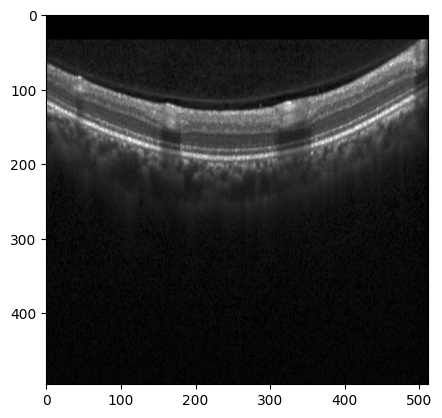

In [30]:
save_dir = 'image_resized/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
os.makedirs(save_dir + 'MS/', exist_ok=True)
os.makedirs(save_dir + 'HC/', exist_ok=True)

for i, image_file in enumerate(image_list):
    disease, patient_idx, frame_idx = extract_hcms_disease_patient(image_file)
    image = Image.open(os.path.join(image_dir, image_file))
    np_img = np.array(image).astype(np.int32)

    if np_img.shape[1] == 1024:
        np_img = (np_img[:, ::2] + np_img[:, 1::2]) // 2
        np_img = np_img.astype(np.uint8)
    image = Image.fromarray(np_img)
    resized_image = image

    split_name = image_file.split('_')
    new_name = '_'.join(split_name[:-1] + [split_name[0]] + [split_name[-1]])

    image.save(os.path.join(save_dir, disease.upper(), new_name))
    if i % 100 == 0:
        print(i)
plt.imshow(resized_image, cmap='gray')
